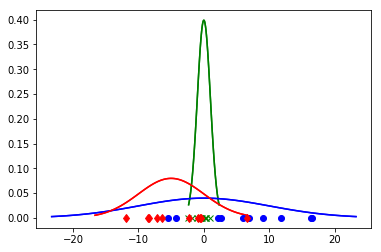

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

norm1 = norm(loc=0, scale=1)
norm2 = norm(loc=0, scale=10)
norm3 = norm(loc=-5, scale=5)

x1 = np.linspace(norm1.ppf(0.01), norm1.ppf(0.99), 100)
x2 = np.linspace(norm2.ppf(0.01), norm2.ppf(0.99), 100)
x3 = np.linspace(norm3.ppf(0.01), norm3.ppf(0.99), 100)

plt.plot(x1, norm1.pdf(x1),'g-', label='norm pdf1')
plt.plot(x2, norm2.pdf(x2),'b-',label='norm pdf2')
plt.plot(x3, norm3.pdf(x3),'r-', label='norm pdf3')

p1 = norm1.rvs(size=10)
p2 = norm2.rvs(size=10)
p3 = norm3.rvs(size=10)

X =np.concatenate((p1, p2, p3))

val = 0
zero_vec = np.zeros_like(p1)

plt.plot(p1, zero_vec , 'gx')
plt.plot(p2, zero_vec , 'bo')
plt.plot(p3, zero_vec , 'rd')
plt.show()

(3,)


/home/simipro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


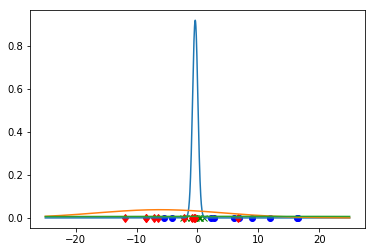

means: [[-0.37130375]
 [-6.13773645]
 [ 4.08183927]]
cov [[[  0.43472177]]

 [[ 10.45982107]]

 [[ 55.4064238 ]]]
weighs [ 0.311503    0.20824413  0.48025287]


In [86]:
# prepare plot

plt.plot(p1, zero_vec , 'gx')
plt.plot(p2, zero_vec , 'bo')
plt.plot(p3, zero_vec , 'rd')

####


from sklearn.mixture import GaussianMixture

X = X.reshape(-1, 1)
X_ = np.linspace(-25, 25, 50/0.01)
X_ = X_.reshape(-1,1)

print(np.array([0,0,-5], ndmin=1).shape)
clf = GaussianMixture(3, means_init=np.array([0,0,-5]).reshape(-1,1))
clf.fit(X)
means = clf.means_
cov = clf.covariances_
weights = clf.weights_

for i in range(len(means)):
    curr_norm = norm(loc=means[i], scale=cov[i])
    x2 = curr_norm.pdf(X_)
    plt.plot(X_, x2)

plt.show()
print("means:" , means)
print("cov", cov)
print("weighs", weights)

